## Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods

### Section 1

In [1]:
import numpy as np
import scipy
import time
import math
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns  
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = (100)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

Implementing functions

In [2]:
def f_cube(x):
    return x ** 3


def f_abs(x):
    return abs(x - 0.2)
    

def f_sin(x):
    return x * np.sin(1/x)

Implementing algorithms

In [3]:
def bruteforce_search(f, a, b, e):
    i = 0
    x_min = a
    f_min = f(a)
    x_lst = np.arange(a, b+e, e)
    for x in x_lst: # run through the all elements and calculate function values
        f_x = f(x) 
        if f_x < f_min:
            f_min = f_x
            x_min = x
        i += 1
    return f'x = {round(x_min, 3)}, f(x) = {round(f_min, 3)}, iterations = {i}'
        

def dichotomy_search(f, a, b, e): 
    i = 0
    while abs(b - a) >  e:
        x = (a + b)/2
        x1 = (x - e)
        x2 = (x + e)
        if f(x2) > f(x1): # selecting between two distinct alternatives at each step
            b = x
        else:
            a = x
        i += 1
    return f'x = {round((a + b)/2, 3)}, f(x) = {round(f((a + b)/2), 3)},  iterations = {i}'



def golden_search(f, a, b, e):
    i = 0
    
    x1 = a + 0.382 * (b - a)
    x2 = b - 0.382 * (b - a)
    
    f_x1 = f(x1)
    f_x2 = f(x2)

    while abs(x2 - x1) > e:
        if f_x2 > f_x1:
            b = x2
            x2 = x1
            x1 = a + (b - a) * 0.382 
            f_x2 = f_x1
            f_x1 = f(x1)
        else:
            a = x1
            x1 = x2
            x2 = b - (b - a) * 0.382 
            f_x1 = f_x2
            f_x2 = f(x2)
        i += 1
      
    return f'x = {round(((x1+x2)/2), 3)}, f(x) = {round(f((x1+x2)/2),3)}, iterations = {i}'

Vizualization of results

In [4]:
bruteforce_search(f_cube, 0, 1, 0.001), dichotomy_search(f_cube, 0, 1, 0.001), golden_search(f_cube, 0, 1, 0.001)

('x = 0, f(x) = 0, iterations = 1001',
 'x = 0.0, f(x) = 0.0,  iterations = 10',
 'x = 0.002, f(x) = 0.0, iterations = 12')

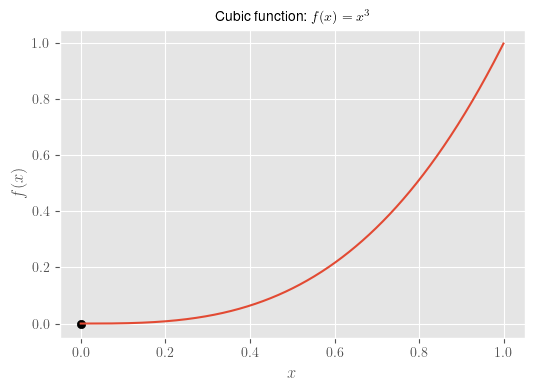

In [5]:
x_arr = np.arange(0, 1, 0.001)
plt.plot(x_arr, x_arr**3)
plt.scatter(0, 0, color='black')
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title('Cubic function:  $f(x) = x^3$', size=10)
fgnm = f'cubic.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [6]:
bruteforce_search(f_abs, 0, 1, 0.001), dichotomy_search(f_abs, 0, 1, 0.001), golden_search(f_abs, 0, 1, 0.001)

('x = 0.2, f(x) = 0.0, iterations = 1001',
 'x = 0.2, f(x) = 0.0,  iterations = 10',
 'x = 0.2, f(x) = 0.0, iterations = 12')

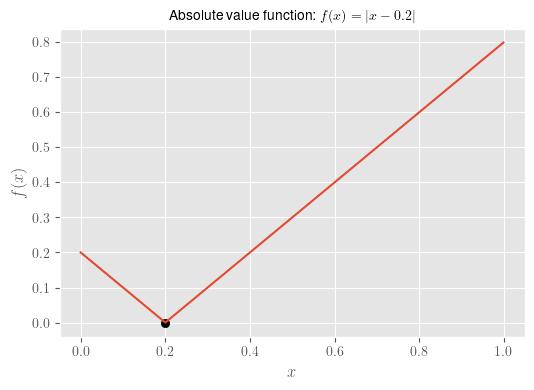

In [7]:
x_arr = np.arange(0, 1, 0.001)
plt.plot(x_arr, abs(x_arr - 0.2))
plt.scatter(0.2, 0, color='black')
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title('Absolute value function: $f(x) = |x-0.2|$', size=10)

fgnm = f'abs.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [8]:
bruteforce_search(f_sin, 0.01, 1, 0.001), dichotomy_search(f_sin, 0.01, 1, 0.001), golden_search(f_sin, 0.01, 1, 0.001)

('x = 0.223, f(x) = -0.217, iterations = 991',
 'x = 0.222, f(x) = -0.217,  iterations = 10',
 'x = 0.222, f(x) = -0.217, iterations = 12')

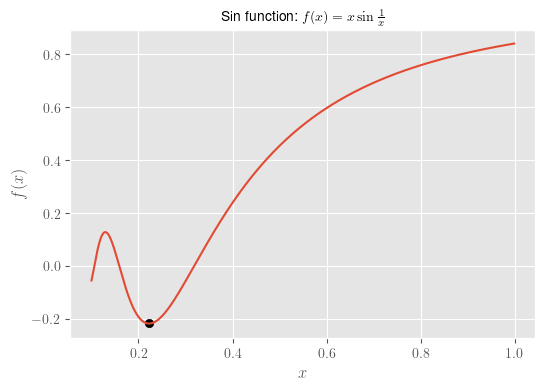

In [9]:
x_arr = np.arange(0.1, 1, 0.001)
plt.plot(x_arr, x_arr*np.sin(1/x_arr))
plt.scatter(0.223, -0.217, color='black')
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title(r'Sin function:  $f(x) = x \sin \frac{1}{x}$', size=10)

fgnm = f'sin.pdf'
plt.savefig("".join((fgnm)))
plt.show()

### Section 2

Params generation

In [10]:
alpha = float(np.random.random(1))
beta = float(np.random.random(1))
delta_k = np.random.standard_normal(100)

Data generation

In [11]:
x_k = np.arange(0, 100, 1)/100
y_k = alpha*x_k + beta + delta_k

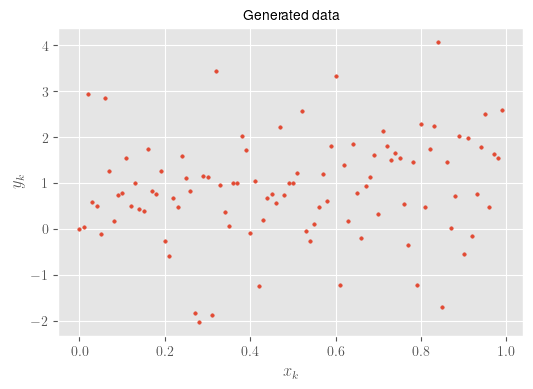

In [12]:
plt.scatter(x_k, y_k, s=6)
plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.title('Generated data', size=10)

fgnm = f'data.pdf'
plt.savefig("".join((fgnm)))
plt.show()

Implementing functions

In [13]:
def f_linear(x, a, b):
    return a*x + b
    
    
def f_rational(x, a, b):
    return a/(1+b*x)


def f_loss(x, fit):
    result = 0
    for i in range(len(x_k)):
        result += (fit(x_k[i], x[0], x[1]) - y_k[i])**2
    return result

In [14]:
def bruteforce_two_dim(f, bounds, eps=1e-3, fix=None, x0=0.0, **kwargs):
    
    x_min = bounds[0]
    x = [x_min, x0]
    f_min = f(x[::fix], **kwargs)  
    
    x_lst = np.arange(bounds[0], bounds[1]+eps, eps)
        
    for xi in x_lst:
        x[0] = xi
        f_x = f(x[::fix], **kwargs) 
        if f_x < f_min:
            f_min = f_x
            x_min = xi
            
    return x_min, f_min

Implementing algorithms

In [15]:
def bruteforce_search(function, args):
    return scipy.optimize.brute(function, ranges=(slice(0, 1, 0.001), (slice(0, 1, 0.001))), args=(args,))


def gauss_bruteforce(f, bnds, x0, eps, **kwargs):
    x1, f1 = bruteforce_two_dim(f, fix=1, x0=x0[1], bounds=bnds[0], **kwargs) # zero iteration
    x2, f2 = bruteforce_two_dim(f, fix=-1, x0=x1, bounds=bnds[1], **kwargs)
    
    while abs(f1 - f2) >= eps:
        x1, f1  = bruteforce_two_dim(f, fix=1, x0=x2, bounds=bnds[0], **kwargs)
        x2, f2  = bruteforce_two_dim(f, fix=-1, x0=x1, bounds=bnds[1], **kwargs)
    return x1, x2


def neldermead_search(function, args):
    return scipy.optimize.minimize(function, x0=(0, 0), method='Nelder-Mead', args=(args,))

Apply algorithms and calculate execution time and the number of iterations

In [16]:
start_time = time.time()
a_bruteforce, b_bruteforce = bruteforce_search(f_loss, f_linear)
t_bruteforce = round(time.time() - start_time, 5)

In [17]:
start_time = time.time()
a_gauss, b_gauss = gauss_bruteforce(f_loss, [[0, 1], [0, 1]], x0=[0.0, 0.0], fit=f_linear, eps=1e-3)
t_gauss = round(time.time() - start_time, 5)


start_time = time.time()
a_neldermead, b_neldermead = neldermead_search(f_loss, f_linear).x
t_neldermead = round(time.time() - start_time , 5)

In [18]:
a_bruteforce, a_gauss, a_neldermead 

(0.644004699624998, 0.659, 0.6440024652123624)

In [19]:
b_bruteforce, b_gauss, b_neldermead

(0.5656742115563617, 0.558, 0.565657471642242)

Execution time

In [20]:
t_bruteforce, t_gauss, t_neldermead

(154.65562, 2.17655, 0.02098)

Vizualization of results

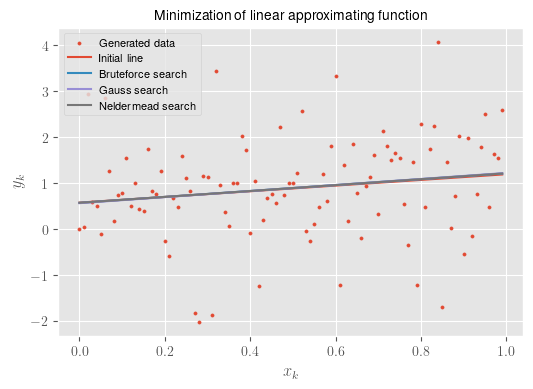

In [21]:
plt.scatter(x_k, y_k, s=5, label='Generated data')

plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.plot(x_k, alpha*x_k + beta, label='Initial line')
plt.plot(x_k, a_bruteforce*x_k + b_bruteforce, label='Bruteforce search')
plt.plot(x_k, a_gauss*x_k + b_gauss, label='Gauss search')
plt.plot(x_k, a_neldermead*x_k + b_neldermead, label='Neldermead search')
plt.title('Minimization of linear approximating function', size=10)
plt.legend(fontsize=8)

fgnm = f'linear_approx.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [22]:
start_time = time.time()
a_bruteforce, b_bruteforce = bruteforce_search(f_loss, f_rational)
t_bruteforce = round(time.time() - start_time, 5)


In [23]:
start_time = time.time()
a_gauss, b_gauss = gauss_bruteforce(f_loss, [[-1, 1], [-1, 1]], x0=[0.0, 0.0], fit=f_rational, eps=1e-3)
t_gauss = round(time.time() - start_time, 5)

start_time = time.time()
neldermead_result = neldermead_search(f_loss, f_rational)
t_neldermead = round(time.time() - start_time , 5)

a_neldermead, b_neldermead = neldermead_result.x

In [24]:
a_bruteforce, a_gauss, a_neldermead

(0.5948632298535461, 0.6030000000000015, 0.5948684054531237)

In [25]:
b_bruteforce, b_gauss, b_neldermead

(-0.574895257158209, -0.5659999999999996, -0.5748542215221975)

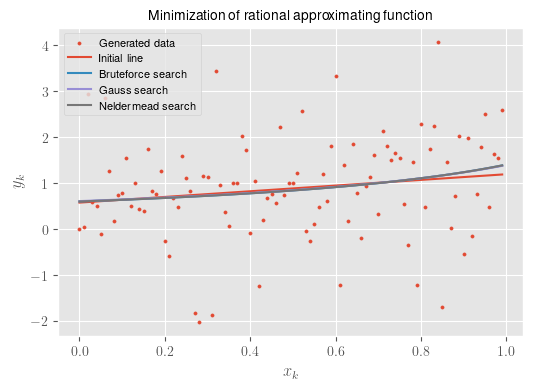

In [26]:
plt.scatter(x_k, y_k, s=5, label='Generated data')

plt.xlabel(r'$x_k$', fontsize=12)
plt.ylabel(r'$y_k$', fontsize=12)
plt.plot(x_k, alpha*x_k+beta, label='Initial line')
plt.plot(x_k, a_bruteforce/(1+b_bruteforce*x_k), label='Bruteforce search')
plt.plot(x_k, a_gauss/(1+b_gauss*x_k), label='Gauss search')
plt.plot(x_k, a_neldermead/(1+b_neldermead*x_k), label='Neldermead search')
plt.title('Minimization of rational approximating function', size=10)
plt.legend(fontsize=8)
fgnm = f'rational_approx.pdf'
plt.savefig("".join((fgnm)))
plt.show()

In [27]:
t_bruteforce, t_gauss, t_neldermead

(160.76909, 8.27468, 0.02775)